In [1]:
import pandas as pd
pd.options.display.max_columns = 50
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report
import pickle
from pathlib import Path

In [2]:
df_load = pd.read_csv('dqlab_telco.csv')

# baris dan data
print(df_load.shape)

(7113, 22)


In [3]:
print(df_load.head())

   UpdatedAt   customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     202006  45759018157  Female              0     Yes         No     1.0   
1     202006  45557574145    Male              0      No         No    34.0   
2     202006  45366876421    Male              0      No         No     2.0   
3     202006  45779536532    Male              0      No         No    45.0   
4     202006  45923787906  Female              0      No         No     2.0   

  PhoneService     MultipleLines InternetService OnlineSecurity OnlineBackup  \
0           No  No phone service             DSL             No          Yes   
1          Yes                No             DSL            Yes           No   
2          Yes                No             DSL            Yes          Yes   
3           No  No phone service             DSL            Yes           No   
4          Yes                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV S

In [4]:
print(df_load['customerID'].nunique())

7017


In [5]:
df_load['valid_id'] = df_load['customerID'].astype(str).str.match(r'(45\d{9,10})')
df_load = (df_load[df_load['valid_id']==True]).drop('valid_id', axis=1)
print('Hasil jumlah ID Customer yang terfilter adalah' ,df_load['customerID'].count())

Hasil jumlah ID Customer yang terfilter adalah 7006


In [6]:
df_load.drop_duplicates()

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,202006,45557574145,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,202006,45366876421,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,202006,45779536532,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,202006,45923787906,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7108,202006,45117219093,Male,0,Yes,Yes,53.0,Yes,Yes,DSL,Yes,Yes,No,No,No,Yes,Two year,No,Bank transfer (automatic),69.70,3686.05,NaN
7109,202006,45564915800,Female,0,No,No,12.0,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,One year,No,Mailed check,95.50,1115.15,NaN
7110,202006,45655964195,Male,0,No,No,26.0,Yes,No,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,98.65,2537.00,NaN
7111,202006,45899251814,Male,0,No,No,21.0,Yes,No,DSL,No,No,Yes,No,No,Yes,Month-to-month,No,Mailed check,61.65,1393.60,NaN


In [7]:
df_load = df_load.sort_values('UpdatedAt', ascending=False).drop_duplicates('customerID')
print('Hasil jumlah ID Customer yang sudah dihilangkan duplikasinya (distinct) adalah', df_load['customerID'].count())

Hasil jumlah ID Customer yang sudah dihilangkan duplikasinya (distinct) adalah 6993


In [8]:
df_load['Churn'].isnull().sum()

43

In [9]:
df_load.dropna(subset=['Churn'],inplace=True)
print('Total Rows dan kolom Data setelah dihapus data Missing Values adalah', df_load.shape)

Total Rows dan kolom Data setelah dihapus data Missing Values adalah (6950, 22)


In [10]:
df_load.isnull().values.any()

True

In [11]:
print('\nJumlah Missing Values masing-masing kolom, adalah:')
print(df_load.isnull().sum().sort_values(ascending=False))


Jumlah Missing Values masing-masing kolom, adalah:
tenure              99
MonthlyCharges      26
TotalCharges        15
UpdatedAt            0
DeviceProtection     0
PaymentMethod        0
PaperlessBilling     0
Contract             0
StreamingMovies      0
StreamingTV          0
TechSupport          0
OnlineBackup         0
customerID           0
OnlineSecurity       0
InternetService      0
MultipleLines        0
PhoneService         0
Dependents           0
Partner              0
SeniorCitizen        0
gender               0
Churn                0
dtype: int64


In [12]:
#mengisi kolom tenure yang missing value dengan angka 11
df_load.fillna(11, inplace=True)

In [13]:
# Handling missing values num vars (except Tenure)
for col_name in list(['MonthlyCharges', 'TotalCharges']):
    median = df_load[col_name].median()
    df_load[col_name].fillna(median, inplace=True)

df_load.isnull().sum().sort_values(ascending=False)

UpdatedAt           0
customerID          0
TotalCharges        0
MonthlyCharges      0
PaymentMethod       0
PaperlessBilling    0
Contract            0
StreamingMovies     0
StreamingTV         0
TechSupport         0
DeviceProtection    0
OnlineBackup        0
OnlineSecurity      0
InternetService     0
MultipleLines       0
PhoneService        0
tenure              0
Dependents          0
Partner             0
SeniorCitizen       0
gender              0
Churn               0
dtype: int64

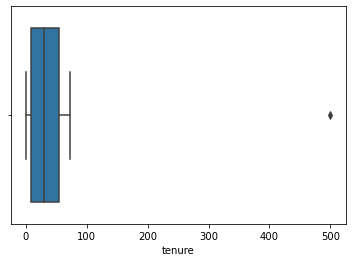

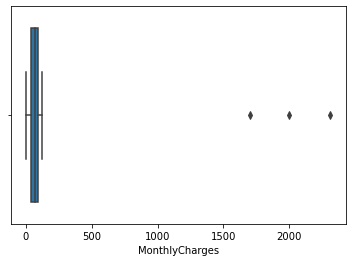

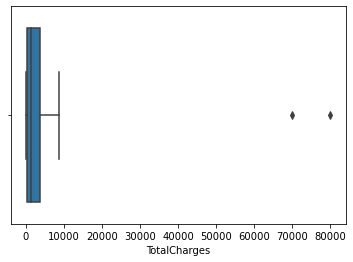

In [14]:
plt.figure()
sns.boxplot(x=df_load['tenure'])
plt.show()

plt.figure()
sns.boxplot(x=df_load['MonthlyCharges'])
plt.show()

plt.figure()
sns.boxplot(x=df_load['TotalCharges'])
plt.show()

In [15]:
#handling with IQR
Q1 = (df_load[['tenure', 'MonthlyCharges', 'TotalCharges']]).quantile(0.25)
Q3 = (df_load[['tenure', 'MonthlyCharges', 'TotalCharges']]).quantile(0.75)

IQR = Q3 - Q1
maximum = Q3 + (1.5*IQR)
print('Nilai Maximum dari masing-masing Variable adalah: ')
print(maximum)
minimum = Q1 - (1.5*IQR)
print('\nNilai Minimum dari masing-masing Variable adalah: ')
print(minimum)

more_than = (df_load > maximum)
lower_than = (df_load < minimum)
df_load = df_load.mask(more_than, maximum, axis=1)
df_load = df_load.mask(lower_than, minimum, axis=1)

print('\nPersebaran data setelah ditangani Outlier: ')
print(df_load[['tenure', 'MonthlyCharges', 'TotalCharges']].describe())

Nilai Maximum dari masing-masing Variable adalah: 
tenure             124.00000
MonthlyCharges     171.20625
TotalCharges      8897.56875
dtype: float64

Nilai Minimum dari masing-masing Variable adalah: 
tenure             -60.00000
MonthlyCharges     -45.74375
TotalCharges     -4696.38125
dtype: float64

Persebaran data setelah ditangani Outlier: 
            tenure  MonthlyCharges  TotalCharges
count  6950.000000     6950.000000   6950.000000
mean     32.423165       64.770348   2283.061502
std      24.581073       30.212351   2267.799001
min       0.000000        0.000000     11.000000
25%       9.000000       35.612500    401.350000
50%      29.000000       70.350000   1397.100000
75%      55.000000       89.850000   3799.837500
max     124.000000      171.206250   8897.568750


<ipython-input-15-31e2b31917ba>:13: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  more_than = (df_load > maximum)
<ipython-input-15-31e2b31917ba>:14: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  lower_than = (df_load < minimum)


In [16]:
for col_name in list(['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']):
        print('\nUnique Values Count \033[1m' + 'before standardized \033[0m Variable',col_name)
        print(df_load[col_name].value_counts())


Unique Values Count before standardized  Variable gender
Male         3499
Female       3431
Wanita         14
Laki-Laki       6
Name: gender, dtype: int64

Unique Values Count before standardized  Variable SeniorCitizen
0    5822
1    1128
Name: SeniorCitizen, dtype: int64

Unique Values Count before standardized  Variable Partner
No     3591
Yes    3359
Name: Partner, dtype: int64

Unique Values Count before standardized  Variable Dependents
No     4870
Yes    2060
Iya      20
Name: Dependents, dtype: int64

Unique Values Count before standardized  Variable PhoneService
Yes    6281
No      669
Name: PhoneService, dtype: int64

Unique Values Count before standardized  Variable MultipleLines
No                  3346
Yes                 2935
No phone service     669
Name: MultipleLines, dtype: int64

Unique Values Count before standardized  Variable InternetService
Fiber optic    3057
DSL            2388
No             1505
Name: InternetService, dtype: int64

Unique Values Count befor

In [17]:
df_load = df_load.replace(['Wanita', 'Laki-laki', 'Churn', 'Iya'], ['Female', 'Male', 'Yes', 'Yes'])

# masukan variabel
for col_name in list(['gender', 'Dependents', 'Churn']):
    print('\nUnique Values Count \033[1m' + 'after standardized \033[0m Variable',col_name)
    print(df_load[col_name].value_counts())


Unique Values Count after standardized  Variable gender
Male         3499
Female       3445
Laki-Laki       6
Name: gender, dtype: int64

Unique Values Count after standardized  Variable Dependents
No     4870
Yes    2080
Name: Dependents, dtype: int64

Unique Values Count after standardized  Variable Churn
No     5114
Yes    1836
Name: Churn, dtype: int64


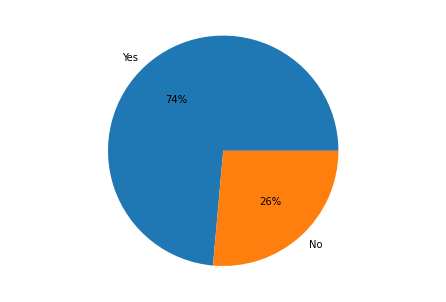

In [18]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['Yes','No']
churn = df_load.Churn.value_counts()
ax.pie(churn, labels=labels, autopct='%.0f%%')
plt.show()

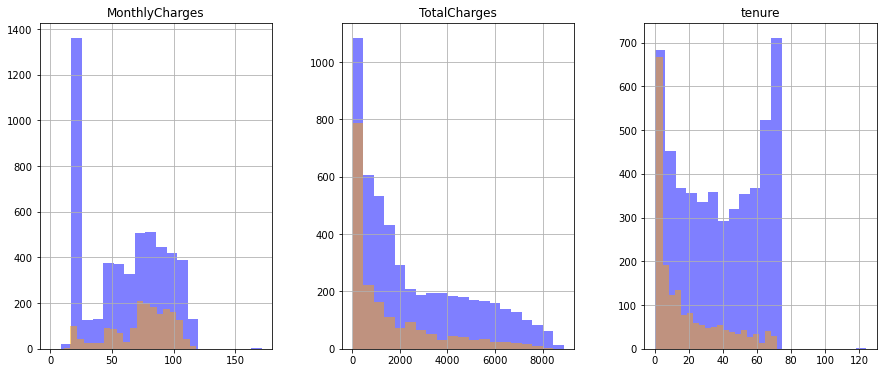

In [19]:
# creating bin in chart
numerical_features = ['MonthlyCharges', 'TotalCharges', 'tenure']
fig, ax = plt.subplots(1, 3, figsize=(15, 6))

# overlays of histogram per each numerical_features
df_load[df_load.Churn == 'No'][numerical_features].hist(bins=20, color='blue', alpha=0.5, ax=ax)
df_load[df_load.Churn == 'Yes'][numerical_features].hist(bins=20, color='orange', alpha=0.5, ax=ax)
plt.show()

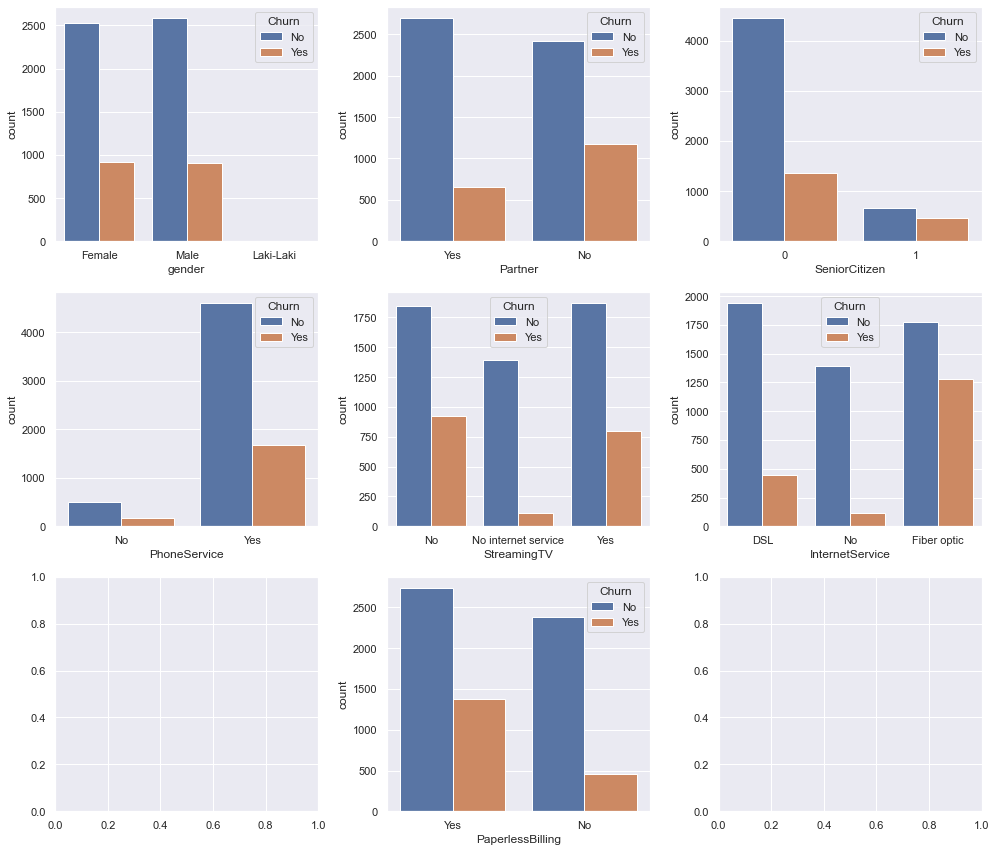

In [20]:
sns.set_theme(style='darkgrid')
fig, ax = plt.subplots(3, 3, figsize=(14, 12))
sns.countplot(data=df_load, x='gender', hue='Churn', ax=ax[0][0])
sns.countplot(data=df_load, x='Partner', hue='Churn', ax=ax[0][1])
sns.countplot(data=df_load, x='SeniorCitizen', hue='Churn', ax=ax[0][2])
sns.countplot(data=df_load, x='PhoneService', hue='Churn', ax=ax[1][0])
sns.countplot(data=df_load, x='StreamingTV', hue='Churn', ax=ax[1][1])
sns.countplot(data=df_load, x='InternetService', hue='Churn', ax=ax[1][2])
sns.countplot(data=df_load, x='PaperlessBilling', hue='Churn', ax=ax[2][1])
plt.tight_layout()
plt.show()

In [21]:
cleaned_df = df_load.drop(['UpdatedAt', 'customerID'], axis=1)
cleaned_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
4727,Male,0,Yes,No,60.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.50,1198.80,No
4738,Male,0,No,No,5.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,No,Mailed check,104.10,541.90,Yes
4737,Female,0,Yes,No,72.0,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),115.50,8312.75,No
4736,Female,0,Yes,Yes,56.0,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),81.25,4620.40,No


In [22]:
#Convert all the non-numeric columns to numerical data types
for column in cleaned_df.columns:
    if cleaned_df[column].dtype == np.number : continue
    #Perform encoding for each non-numeric column
    cleaned_df[column] = LabelEncoder().fit_transform(cleaned_df[column])
cleaned_df.describe()

<ipython-input-22-cba2b90bf412>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleaned_df[column].dtype == np.number : continue


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,6950.00000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000
mean,1.00777,0.162302,0.483309,0.299281,32.423165,0.903741,0.940863,0.872950,0.789496,0.907194,0.904604,0.796115,0.985180,0.992950,0.690216,0.591942,1.576403,64.770348,2283.061502,0.264173
std,0.99961,0.368754,0.499757,0.457976,24.581073,0.294967,0.948880,0.737618,0.859795,0.880313,0.880037,0.861389,0.885069,0.885165,0.833363,0.491509,1.067780,30.212351,2267.799001,0.440923
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000
25%,0.00000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.612500,401.350000,0.000000
50%,2.00000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1397.100000,0.000000
75%,2.00000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3799.837500,1.000000
max,2.00000,1.000000,1.000000,1.000000,124.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,171.206250,8897.568750,1.000000


In [23]:
# predictor dan target
X = cleaned_df.drop('Churn', axis=1)
y = cleaned_df['Churn']

# Spitting train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# print according to expected result
print('Jumlah baris dan kolom dari x_train adalah:', X_train.shape,', sedangkan jumlah baris dan kolom y_train adalah:', y_train.shape)
print('presentase Churn di data training adalah:')
print(y_train.value_counts(normalize=True))
print('Jumlah baris dan kolom dari x_test adalah:', X_test.shape,', sedangkan jumlah baris dan kolom y_test adalah:', y_test.shape)
print('presentase Churn di data training adalah:')
print(y_test.value_counts(normalize=True))

Jumlah baris dan kolom dari x_train adalah: (4865, 19) , sedangkan jumlah baris dan kolom y_train adalah: (4865,)
presentase Churn di data training adalah:
0    0.734841
1    0.265159
Name: Churn, dtype: float64
Jumlah baris dan kolom dari x_test adalah: (2085, 19) , sedangkan jumlah baris dan kolom y_test adalah: (2085,)
presentase Churn di data training adalah:
0    0.738129
1    0.261871
Name: Churn, dtype: float64


In [24]:
# train the model
log_model = LogisticRegression().fit(X_train, y_train)
print('Model Logistic Regression yang terbentuk adalah:', log_model)

Model Logistic Regression yang terbentuk adalah: LogisticRegression()


C:\Users\panji\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
# predict
y_train_pred = log_model.predict(X_train)
# Print classification report 
print('Classification Report Training Model (Logistic Regression) :')
print(classification_report(y_train, y_train_pred))


Classification Report Training Model (Logistic Regression) :
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      3575
           1       0.65      0.55      0.59      1290

    accuracy                           0.80      4865
   macro avg       0.75      0.72      0.73      4865
weighted avg       0.79      0.80      0.80      4865



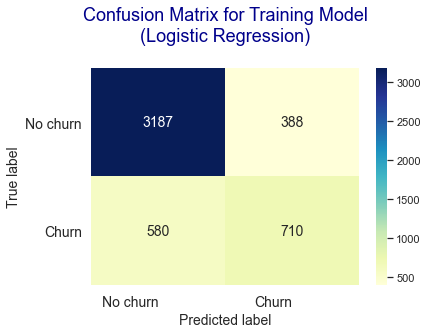

In [26]:
# form confusion matrix to df
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(),  rotation=0, ha='right', fontsize = 14)

plt.title('Confusion Matrix for Training Model\n(Logistic Regression)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)
plt.show()


In [27]:
# predict 
y_test_pred = log_model.predict(X_test)
print('Classification Report Testing Model (Logistic Regression) :')
print(classification_report(y_test, y_test_pred))

Classification Report Testing Model (Logistic Regression) :
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1539
           1       0.65      0.53      0.58       546

    accuracy                           0.80      2085
   macro avg       0.75      0.71      0.73      2085
weighted avg       0.79      0.80      0.79      2085



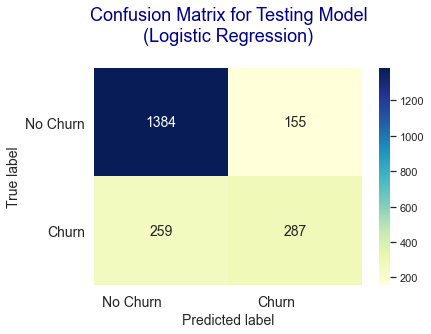

In [28]:
# form matrix to df
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No Churn', 'Churn'), ('No Churn', 'Churn'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(),  rotation=0, ha='right', fontsize = 14)

plt.title('Confusion Matrix for Testing Model\n(Logistic Regression)\n', fontsize = 18, color='darkblue')
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)
plt.show()

In [29]:
# pembuatan model random forest classifier
rdf_model = RandomForestClassifier().fit(X_train, y_train)

In [30]:
# performasi data training 
y_train_pred = rdf_model.predict(X_train)
print('Classification Report Training Model (Random Forest) :')
print(classification_report(y_train, y_train_pred))

Classification Report Training Model (Random Forest) :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3575
           1       1.00      0.99      1.00      1290

    accuracy                           1.00      4865
   macro avg       1.00      1.00      1.00      4865
weighted avg       1.00      1.00      1.00      4865



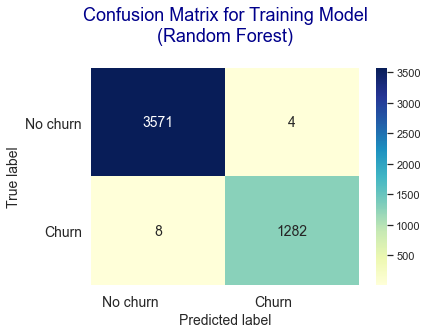

In [31]:
# convert to df
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Random Forest)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [32]:
# performasi data testing
y_test_pred = rdf_model.predict(X_test)
print('Classification Report Training Model (Random Forest) :')
print(classification_report(y_test, y_test_pred))

Classification Report Training Model (Random Forest) :
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1539
           1       0.65      0.47      0.55       546

    accuracy                           0.79      2085
   macro avg       0.74      0.69      0.71      2085
weighted avg       0.78      0.79      0.78      2085

